#### Implementation Steps


1. Problem Defition (including features explanation and provenance of the data)
2. Librairies
3. Data Exploring and Processing
4. Model Developement 
5. Accuracy and Analysis (testing) --> come back to 3 if necessary
6. User Interface



## Problem Defition 

## Librairies

Here, we are importing the librairies necessary to complete the integrity of the project.


In [265]:
# Imports librairies needed for Data Exploring and Processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

%matplotlib inline

# Imports Scikit-Learn librairies needed for Model Development
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import svm

from sklearn.model_selection import train_test_split

# Imports xgboost librairies 
from xgboost import XGBClassifier, plot_importance

# Imports Imbalanced-Learn librairies needed for Model Development
from imblearn.over_sampling import SMOTE

# Imports Scikit-Learn librairies needed for Accuracy and Analysis
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay


# Imports widgets for user interface
from ipywidgets import widgets, Layout

# Imports Ipython displays for user interface
from IPython.display import display, HTML

## Exploratory Data Analysis (EDA)


In [211]:
# Load the dataset
df = pd.read_csv("data/BankChurners.csv") # imports data into a dataframe
print("The shape of the original dataset is {}. It contains {} rows (customers) and {} columns (features).".format(df.shape, df.shape[0], df.shape[1]))


The shape of the original dataset is (10127, 23). It contains 10127 rows (customers) and 23 columns (features).


The dataset contains 10127 rows (customers) and 23 columns (features).

In [213]:
df.head(10) # Displays the first 10 rows of the dataset

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [214]:
# Removes irrelevant features 
df = df.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
                "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                "CLIENTNUM"], axis=1)

print("The shape of the dataset is now {}. It contains {} rows (customers) and {} columns (features).".format(df.shape, df.shape[0], df.shape[1]))

The shape of the dataset is now (10127, 20). It contains 10127 rows (customers) and 20 columns (features).


In [215]:
# Renames columns for consistency and better understanding
df.rename(columns={"Customer_Age": "Age", "Dependent_count": "Dependent_Count",
                   "Education_Level": "Education",
                   "Marital_Status": "Marital_Status",
                   "Income_Category": "Income", "Card_Category": "Card_Type", "Months_on_book": "Months_On_Book",
                   "Total_Relationship_Count": "Relationship_Count",
                   "Months_Inactive_12_mon": "Months_Inactive", "Contacts_Count_12_mon": "Contacts_Count",
                   "Total_Revolving_Bal": "Revolving_Balance", "Avg_Open_To_Buy": "Average_Open_Buy",
                   "Total_Amt_Chng_Q4_Q1": "Amount_Q4_Q1", "Total_Trans_Amt": "Transaction_Amount", "Total_Trans_Ct": "Transaction_Count",
                   "Total_Ct_Chng_Q4_Q1": "Count_Q4_Q1",
                   "Avg_Utilization_Ratio": "Average_Usage_Ratio"},
                   inplace=True)

# Brings target column (Attrition_Flag) as the last column of the dataset
target=df.pop("Attrition_Flag")
df.insert(19,"Attrition_Flag", target)

df.columns.tolist() # displays the rename columns and their sequence order in the dataset

['Age',
 'Gender',
 'Dependent_Count',
 'Education',
 'Marital_Status',
 'Income',
 'Card_Type',
 'Months_On_Book',
 'Relationship_Count',
 'Months_Inactive',
 'Contacts_Count',
 'Credit_Limit',
 'Revolving_Balance',
 'Average_Open_Buy',
 'Amount_Q4_Q1',
 'Transaction_Amount',
 'Transaction_Count',
 'Count_Q4_Q1',
 'Average_Usage_Ratio',
 'Attrition_Flag']

In [216]:
df.to_csv("data/data_after_anomalies.csv")

In [217]:
# Gets information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  10127 non-null  int64  
 1   Gender               10127 non-null  object 
 2   Dependent_Count      10127 non-null  int64  
 3   Education            10127 non-null  object 
 4   Marital_Status       10127 non-null  object 
 5   Income               10127 non-null  object 
 6   Card_Type            10127 non-null  object 
 7   Months_On_Book       10127 non-null  int64  
 8   Relationship_Count   10127 non-null  int64  
 9   Months_Inactive      10127 non-null  int64  
 10  Contacts_Count       10127 non-null  int64  
 11  Credit_Limit         10127 non-null  float64
 12  Revolving_Balance    10127 non-null  int64  
 13  Average_Open_Buy     10127 non-null  float64
 14  Amount_Q4_Q1         10127 non-null  float64
 15  Transaction_Amount   10127 non-null 

In [218]:
# Displays statistics about the dataset and its features
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,10127.0,NaN,NaN,NaN,46.32596,8.016814,26.0,41.0,46.0,52.0,73.0
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_Count,10127.0,NaN,NaN,NaN,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
Education,10127,7,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,10127,4,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Type,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_On_Book,10127.0,NaN,NaN,NaN,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
Relationship_Count,10127.0,NaN,NaN,NaN,3.81258,1.554408,1.0,3.0,4.0,5.0,6.0
Months_Inactive,10127.0,NaN,NaN,NaN,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0


In [219]:
# Verifies the presence of null values in the dataset 
df.isna().sum()

Age                    0
Gender                 0
Dependent_Count        0
Education              0
Marital_Status         0
Income                 0
Card_Type              0
Months_On_Book         0
Relationship_Count     0
Months_Inactive        0
Contacts_Count         0
Credit_Limit           0
Revolving_Balance      0
Average_Open_Buy       0
Amount_Q4_Q1           0
Transaction_Amount     0
Transaction_Count      0
Count_Q4_Q1            0
Average_Usage_Ratio    0
Attrition_Flag         0
dtype: int64

### Visualization of Categorigal Features

In [220]:
# Inserts the categorical features into a list
object_data = df.select_dtypes(include="object") # selects the categorical features
categorical_features = object_data.columns.tolist() # inserts the categorical data into a list
categorical_features

['Gender',
 'Education',
 'Marital_Status',
 'Income',
 'Card_Type',
 'Attrition_Flag']

In [221]:
# Checks the number of unique values in each categorical columns 
object_data.nunique()

Gender            2
Education         7
Marital_Status    4
Income            6
Card_Type         4
Attrition_Flag    2
dtype: int64

In [222]:
# Creates lists of colors that will be used later to create the crosstab bar plots of categorical features
color_gender=["Salmon", "lightblue"]
color_edu = ["Salmon", "lightblue", "lightgray", "springgreen", "gold", "violet", "darkslategrey"]
color_marital=["Salmon", "lightblue", "springgreen", "darkslategrey"]
color_income=["Salmon", "lightblue", "springgreen", "gold", "violet", "darkslategrey"]
color_card=["royalblue", "gold", "grey", "lightsteelblue"]

In [223]:
# Function that creates and displays a crosstab bar plot 
def cross_tab_plot(index, column, width_size, height_size, color_list, title):
    ax = pd.crosstab(index,
                     column,
                     normalize="index").plot(kind="bar",
                                             figsize=(width_size, height_size),
                                             color=color_list, width=0.9)
    plt.title(title)
    plt.ylabel("Count (%)")
    plt.xticks(rotation=0)
    for container in ax.containers:
        ax.bar_label(container, fmt=lambda x: "{:.1f}%".format(x*100))
    return plt

#### Visualization with Crosstab Bar Plots

* Displays crosstab bar plots of categorical features by Attrition Flag by calling the function defined above `cross_tab_plot()`.
* Saves the figures for the Application


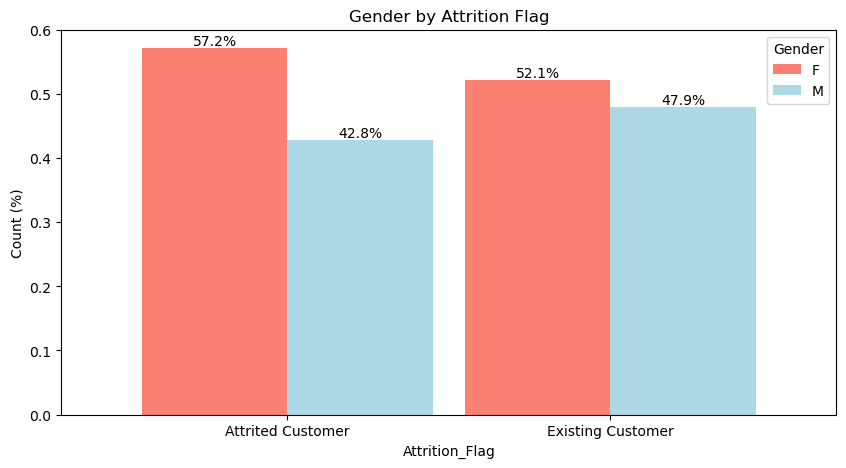

In [224]:
# Gender 
plt = cross_tab_plot(df.Attrition_Flag, df.Gender, 10, 5, color_gender, "Gender by Attrition Flag")
plt.savefig("figures/gender-bar.png")


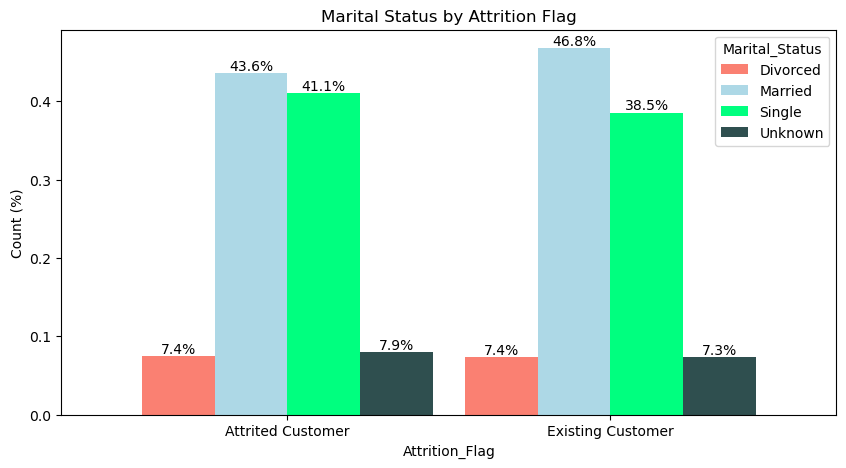

In [225]:
# Marital Status
plt = cross_tab_plot(df.Attrition_Flag, df.Marital_Status, 10, 5, color_marital, "Marital Status by Attrition Flag")
plt.savefig("figures/marital-bar.png")

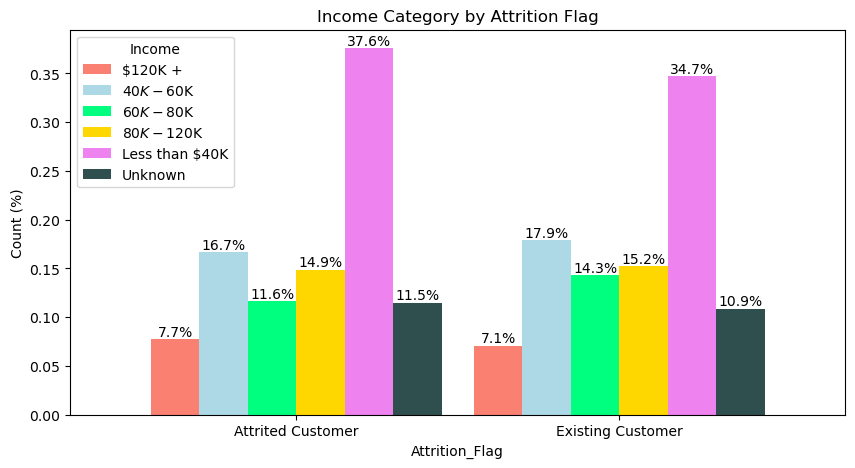

In [226]:
# Income Category
plt = cross_tab_plot(df.Attrition_Flag, df.Income, 10, 5, color_income, "Income Category by Attrition Flag")
plt.savefig("figures/income-bar.png")

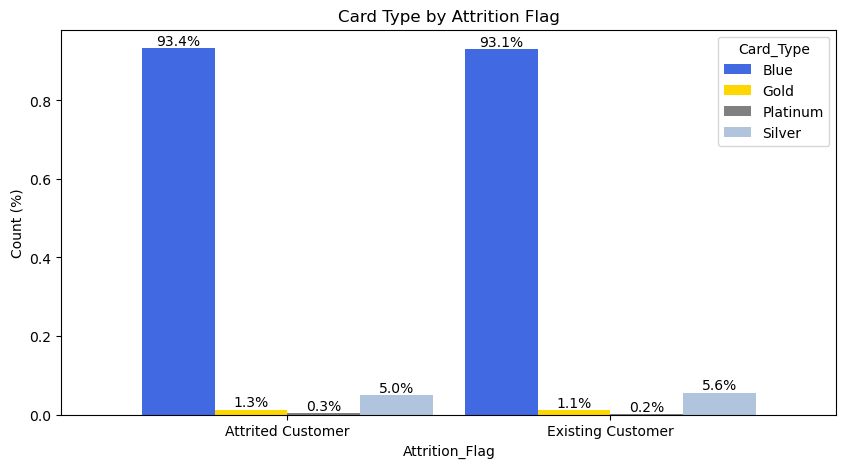

In [227]:
# Card Type
plt = cross_tab_plot(df.Attrition_Flag, df.Card_Type, 10, 5,  color_card,"Card Type by Attrition Flag")
plt.savefig("figures/card-bar.png")

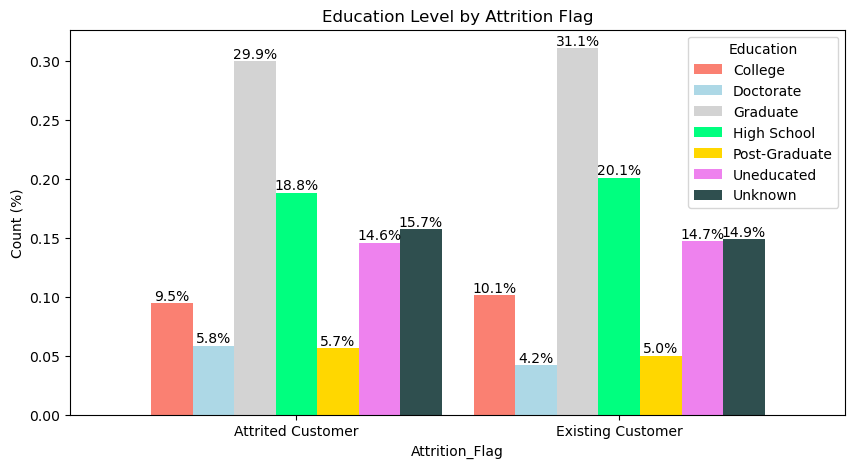

In [228]:
# Education level
plt = cross_tab_plot(df.Attrition_Flag, df.Education, 10, 5, color_edu, "Education Level by Attrition Flag")
plt.savefig("figures/education-bar.png")

### Handling Categorical Variables 

In order to visualize the correlation between important features, the following categorical features (`object` type) will be transformed into numerical features (`int` type):

* `Attrition_Flag`
* `Gender`

In [229]:
# Makes dictionaries 
dict_target = {"Attrited Customer": 1, "Existing Customer" : 0}
dict_gender = {"F": 1, "M":0}

# Remaps the values 
df = df.replace({"Gender": dict_gender,  "Attrition_Flag": dict_target})


df.head()

,Age,Gender,Dependent_Count,Education,Marital_Status,Income,Card_Type,Months_On_Book,Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Revolving_Balance,Average_Open_Buy,Amount_Q4_Q1,Transaction_Amount,Transaction_Count,Count_Q4_Q1,Average_Usage_Ratio,Attrition_Flag
0,45,0,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,49,1,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,51,0,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,40,1,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


In [230]:
(df['Attrition_Flag'] == 0).sum(), (df['Attrition_Flag'] == 1).sum()

(8500, 1627)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  10127 non-null  int64  
 1   Gender               10127 non-null  int64  
 2   Dependent_Count      10127 non-null  int64  
 3   Education            10127 non-null  object 
 4   Marital_Status       10127 non-null  object 
 5   Income               10127 non-null  object 
 6   Card_Type            10127 non-null  object 
 7   Months_On_Book       10127 non-null  int64  
 8   Relationship_Count   10127 non-null  int64  
 9   Months_Inactive      10127 non-null  int64  
 10  Contacts_Count       10127 non-null  int64  
 11  Credit_Limit         10127 non-null  float64
 12  Revolving_Balance    10127 non-null  int64  
 13  Average_Open_Buy     10127 non-null  float64
 14  Amount_Q4_Q1         10127 non-null  float64
 15  Transaction_Amount   10127 non-null 

In [232]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Gender,10127.0,0.529081,0.499178,0.0,0.000,1.000,1.000,1.000
Dependent_Count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_On_Book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Revolving_Balance,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Average_Open_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000


### Visualization of the Correlation Between Features 

In [233]:
# Making a list of numerical columns
num_data = df.select_dtypes(include="number") # selects the numerical features
numerical_features = num_data.columns.tolist() # inserts the numerical data into a list
numerical_features

['Age',
 'Gender',
 'Dependent_Count',
 'Months_On_Book',
 'Relationship_Count',
 'Months_Inactive',
 'Contacts_Count',
 'Credit_Limit',
 'Revolving_Balance',
 'Average_Open_Buy',
 'Amount_Q4_Q1',
 'Transaction_Amount',
 'Transaction_Count',
 'Count_Q4_Q1',
 'Average_Usage_Ratio',
 'Attrition_Flag']

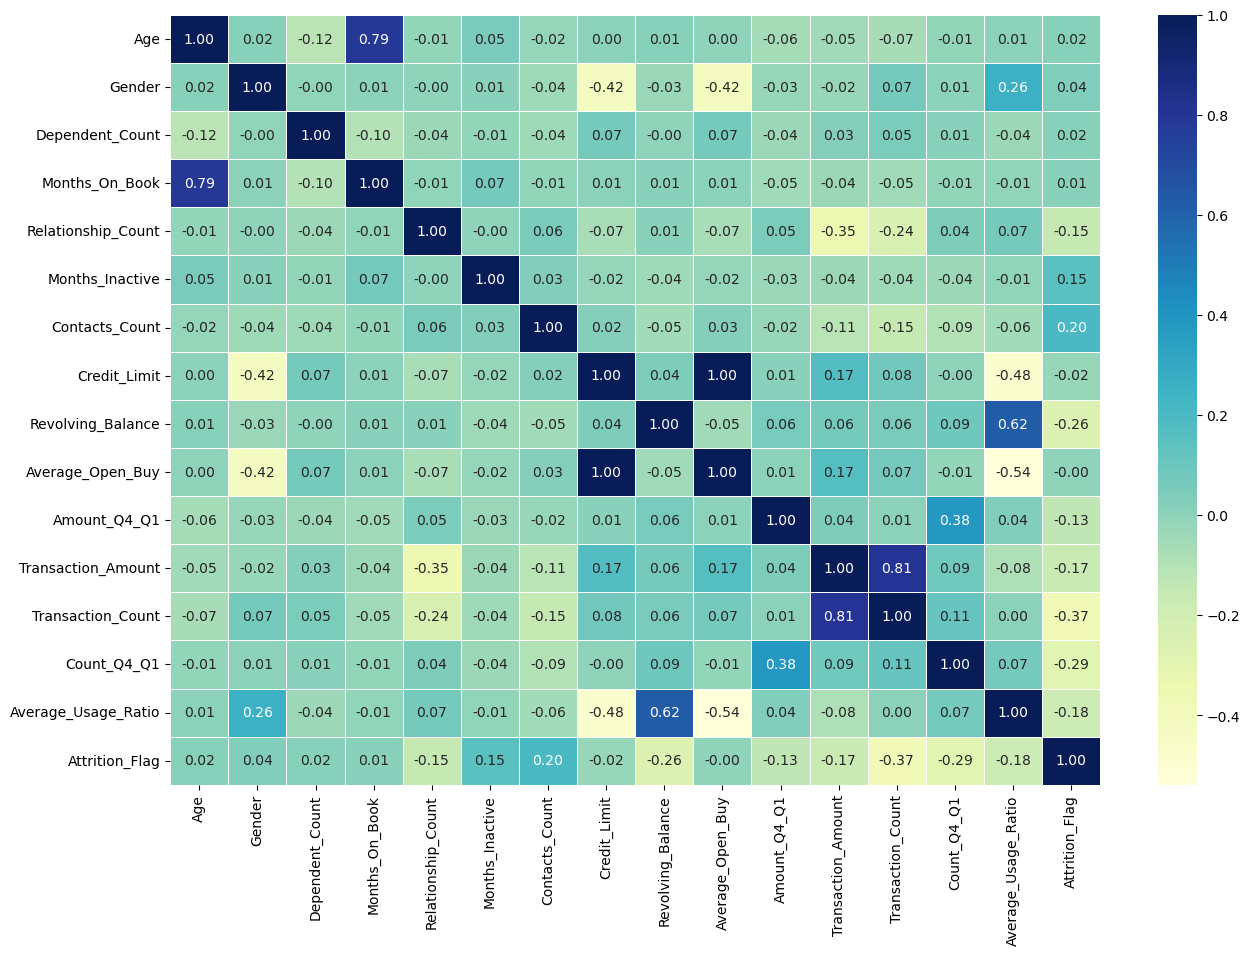

In [234]:
# Correlation Matrix 
correlation_matrix = num_data.corr()
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(correlation_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

Now, let's visualize some of the most important correlations to find out more about their impact on our target column (`Attrition_Flag`).

#### Age vs. Transaction and Change in Transaction Counts

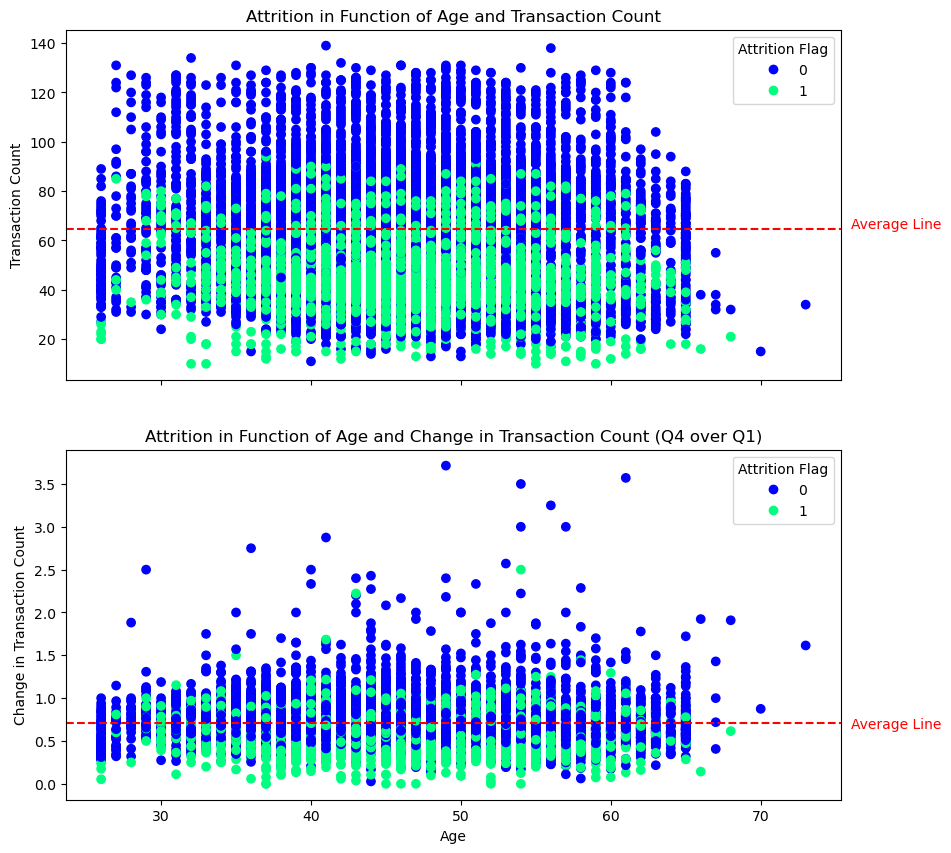

In [235]:
fig, [ax0, ax1] = plt.subplots(nrows=2,
                               ncols=1,
                               sharex=True,
                               figsize=(10, 10))

# Plots the data
scatter = ax0.scatter(x=df.Age, y=df.Transaction_Count, c=df.Attrition_Flag, cmap="winter")

scatter = ax1.scatter(x=df.Age, y=df.Count_Q4_Q1, c=df.Attrition_Flag, cmap="winter")
# Customizes the plot
ax0.set(title="Attrition in Function of Age and Transaction Count",
        ylabel="Transaction Count")

ax1.set(title="Attrition in Function of Age and Change in Transaction Count (Q4 over Q1)",
       xlabel="Age",
       ylabel="Change in Transaction Count")
# Sets the legends
ax0.legend(*scatter.legend_elements(), title="Attrition Flag")

ax1.legend(*scatter.legend_elements(), title="Attrition Flag")
# Displays average lines
ax0.axhline(y=df.Transaction_Count.mean(), color='red', linestyle='--')
ax0.text(76, 65, "Average Line", color='red');

ax1.axhline(y=df.Count_Q4_Q1.mean(), color='red', linestyle='--')
ax1.text(76, 0.65, "Average Line", color='red');


In [236]:
# Saves the figure for the Application
fig.savefig("figures/scatter1-transaction.png")

#### Age Distribution

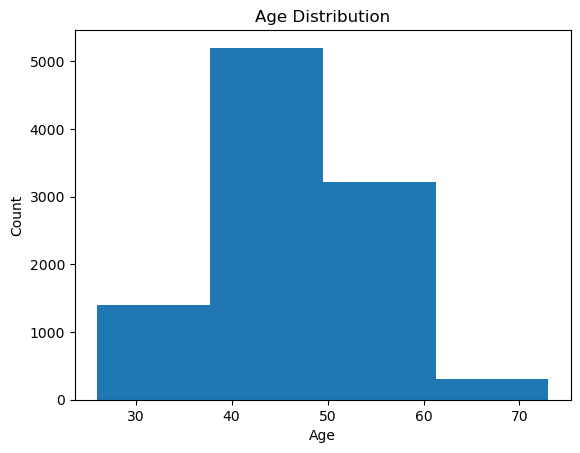

In [237]:
# Displays the age distribution using an histogram
fig, ax = plt.subplots(1, 1)
ax.hist(df.Age, bins=4)
ax.set_title("Age Distribution")
ax.set_xlabel("Age")
ax.set_ylabel("Count");

In [238]:
# Saves the figure for the Application
fig.savefig("figures/age-distribution.png")

#### Transaction Amount, Credit Limit,  Months Inactive,  and Relationship Count vs. Transaction Count 

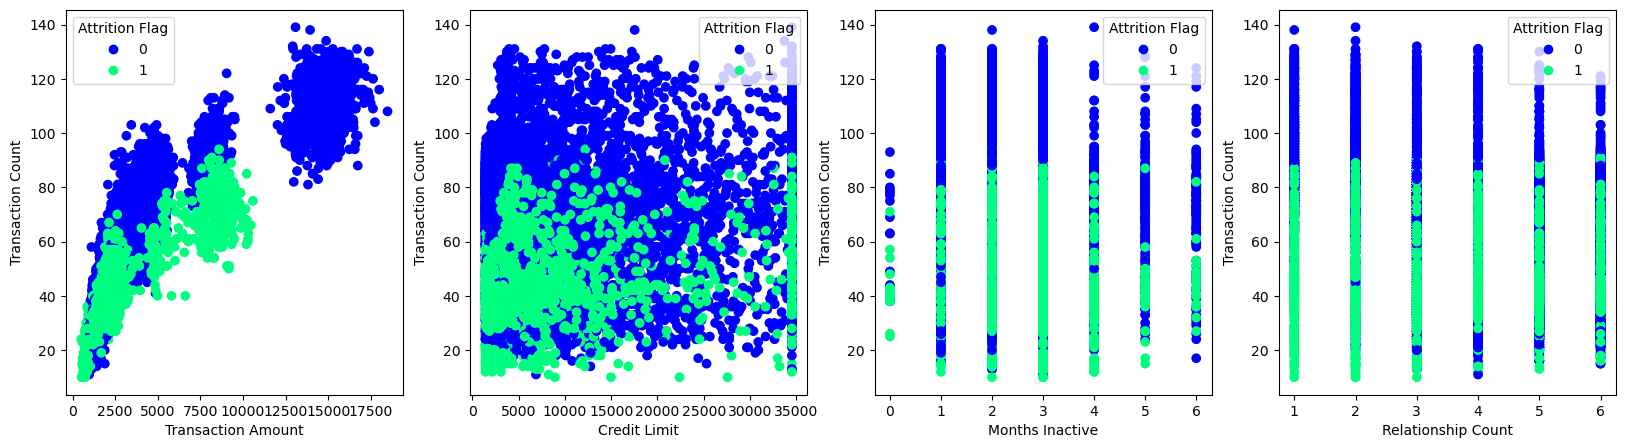

In [239]:
fig, [ax0, ax1, ax2, ax3]  = plt.subplots(nrows=1,
                                          ncols=4,
                                          figsize=(20, 5))

# Plots the data
scatter = ax0.scatter(x=df.Transaction_Amount, y=df.Transaction_Count, c=df.Attrition_Flag, cmap="winter")

scatter = ax1.scatter(x=df.Credit_Limit, y=df.Transaction_Count, c=df.Attrition_Flag, cmap="winter")

scatter = ax2.scatter(x=df.Months_Inactive, y=df.Transaction_Count, c=df.Attrition_Flag, cmap="winter")

scatter = ax3.scatter(x=df.Relationship_Count, y=df.Transaction_Count, c=df.Attrition_Flag, cmap="winter")

# Customizes the plot
ax0.set(ylabel="Transaction Count",
        xlabel="Transaction Amount")

ax1.set(xlabel="Credit Limit",
        ylabel="Transaction Count")

ax2.set(xlabel="Months Inactive",
        ylabel="Transaction Count")
       

ax3.set(xlabel="Relationship Count",
        ylabel="Transaction Count")

# Sets the legends
ax0.legend(*scatter.legend_elements(), title="Attrition Flag");

ax1.legend(*scatter.legend_elements(), title="Attrition Flag");

ax2.legend(*scatter.legend_elements(), title="Attrition Flag");

ax3.legend(*scatter.legend_elements(), title="Attrition Flag");

In [240]:
# Saves the figure for the Application
fig.savefig("figures/scatter2-transaction.png")

#### Credit Limit,  Average Open to Buy, and Revolving Balance vs. Average Usage Ratio

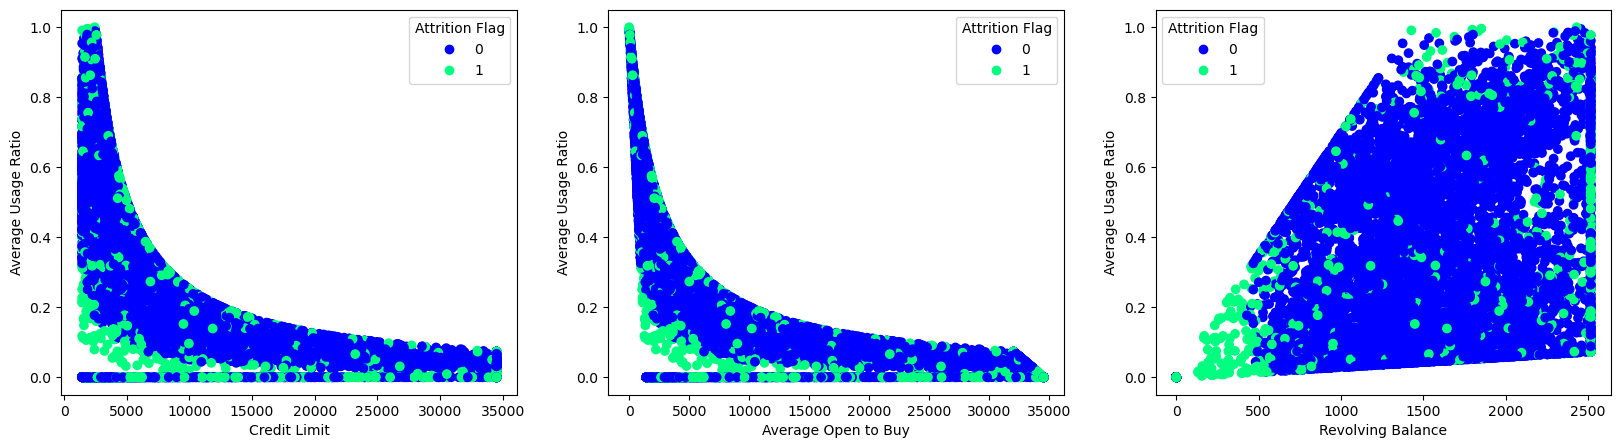

In [241]:
fig,[ax0, ax1, ax2]  = plt.subplots(nrows=1,
                               ncols=3,
                               figsize=(20, 5))
# Plots the data
scatter = ax0.scatter(x=df.Credit_Limit, y=df.Average_Usage_Ratio, c=df.Attrition_Flag, cmap="winter")

scatter = ax1.scatter(x=df.Average_Open_Buy,y=df.Average_Usage_Ratio, c=df.Attrition_Flag, cmap="winter")

scatter = ax2.scatter(x=df.Revolving_Balance, y=df.Average_Usage_Ratio, c=df.Attrition_Flag, cmap="winter")
# Customizes the plot 
ax0.set(xlabel = "Credit Limit",
        ylabel = "Average Usage Ratio")

ax1.set(xlabel="Average Open to Buy",
        ylabel = "Average Usage Ratio")

ax2.set(xlabel="Revolving Balance",
        ylabel="Average Usage Ratio")

# Sets the legends
ax0.legend(*scatter.legend_elements(), title="Attrition Flag");
ax1.legend(*scatter.legend_elements(), title="Attrition Flag");
ax2.legend(*scatter.legend_elements(), title="Attrition Flag");


In [242]:
# Saves the figure for the Application
fig.savefig("figures/scatter3-avg-usage-ratio.png")

**So far, we have accomplished the following:**

1. Explored the data using descriptive methods (`.info()`, `.describe()`).
2. Visualized categorical features using `bar()` graphs.
3. Explored the correlation between features using visualizations (`correlation_matrix()`, `scatter()`, and `hist()`)


*The question now is: "Is the data ready for model development?"*

**Data Preprocessing:**

1. Handling missing values
2. Handling categorical variables
3. Split the data
5. Balancing the dataset



### Handling Missing Values 

In [243]:
# Replaces unknown values with 'nan'
df = df.replace("Unknown", np.nan)
df.isna().sum()

Age                       0
Gender                    0
Dependent_Count           0
Education              1519
Marital_Status          749
Income                 1112
Card_Type                 0
Months_On_Book            0
Relationship_Count        0
Months_Inactive           0
Contacts_Count            0
Credit_Limit              0
Revolving_Balance         0
Average_Open_Buy          0
Amount_Q4_Q1              0
Transaction_Amount        0
Transaction_Count         0
Count_Q4_Q1               0
Average_Usage_Ratio       0
Attrition_Flag            0
dtype: int64

In [244]:
# Drops the missing values
df = df.dropna()
df.isna().sum()

Age                    0
Gender                 0
Dependent_Count        0
Education              0
Marital_Status         0
Income                 0
Card_Type              0
Months_On_Book         0
Relationship_Count     0
Months_Inactive        0
Contacts_Count         0
Credit_Limit           0
Revolving_Balance      0
Average_Open_Buy       0
Amount_Q4_Q1           0
Transaction_Amount     0
Transaction_Count      0
Count_Q4_Q1            0
Average_Usage_Ratio    0
Attrition_Flag         0
dtype: int64

In [245]:
print("The shape of the dataset is now {}. It contains {} rows (customers) and {} columns (features).".format(df.shape, df.shape[0], df.shape[1]))

The shape of the dataset is now (7081, 20). It contains 7081 rows (customers) and 20 columns (features).


### Handling Categorical Variables

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7081 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  7081 non-null   int64  
 1   Gender               7081 non-null   int64  
 2   Dependent_Count      7081 non-null   int64  
 3   Education            7081 non-null   object 
 4   Marital_Status       7081 non-null   object 
 5   Income               7081 non-null   object 
 6   Card_Type            7081 non-null   object 
 7   Months_On_Book       7081 non-null   int64  
 8   Relationship_Count   7081 non-null   int64  
 9   Months_Inactive      7081 non-null   int64  
 10  Contacts_Count       7081 non-null   int64  
 11  Credit_Limit         7081 non-null   float64
 12  Revolving_Balance    7081 non-null   int64  
 13  Average_Open_Buy     7081 non-null   float64
 14  Amount_Q4_Q1         7081 non-null   float64
 15  Transaction_Amount   7081 non-null   

There are still four categorical features to handle, indluding the following:

* `Education`
* `Marital_Status`
* `Income`
* `Card_Type`

In [247]:
# Dictionaries

dict_edu = {"Uneducated": 0, "High School": 1, "College": 2, "Graduate": 3, "Post-Graduate": 4, "Doctorate": 5}

dict_marital = {"Single": 0, "Divorced": 1, "Married": 2}
dict_income = {"Less than $40K": 0, "$40K - $60K": 1, "$60K - $80K": 2, "$80K - $120K": 3, "$120K +": 4}
dict_card = {"Blue": 0, "Silver": 1 , "Gold": 2, "Platinum": 3}
# Remaps the values 

df = df.replace({"Education": dict_edu, "Marital_Status": dict_marital, "Income": dict_income,"Card_Type": dict_card})
df.head()

,Age,Gender,Dependent_Count,Education,Marital_Status,Income,Card_Type,Months_On_Book,Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Revolving_Balance,Average_Open_Buy,Amount_Q4_Q1,Transaction_Amount,Transaction_Count,Count_Q4_Q1,Average_Usage_Ratio,Attrition_Flag
0,45,0,3,1,2,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,49,1,5,3,0,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,51,0,3,3,2,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
4,40,0,3,0,2,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0
5,44,0,2,3,2,1,0,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0


In [248]:
# Saves the data for the Application
df.to_csv("data/cleaned-data.csv")

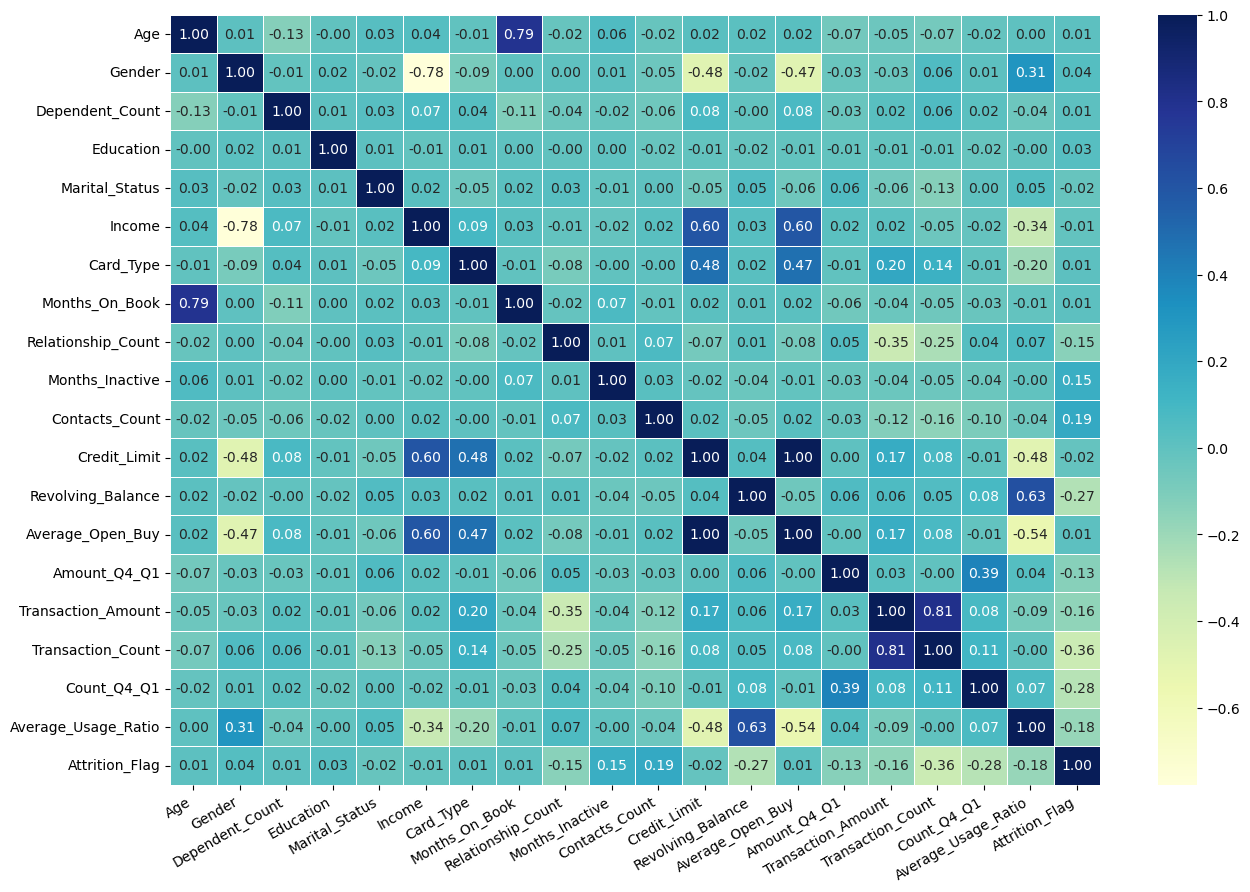

In [249]:
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(correlation_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=30,
                   horizontalalignment='right');

In [250]:
# Saves the figure for the application
fig.savefig("figures/correlation-matrix.png")

### Split the Data

In [251]:
# Split into X(independent variables) and y (target)
X = df.drop("Attrition_Flag", axis=1)
y = df["Attrition_Flag"]

# Split data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)
# Visualize the shapes of our train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5664, 19), (1417, 19), (5664,), (1417,))

### Balancing Dataset  (Upsampling)

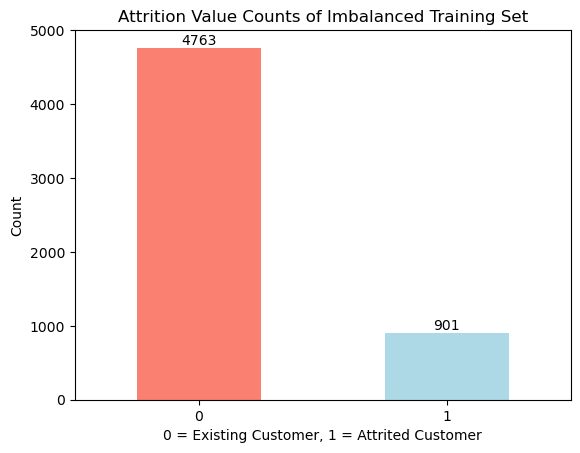

In [252]:
# Visualization of the value counts for the target column (unbalanced training set)
ax = y_train.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.title("Attrition Value Counts of Imbalanced Training Set")
plt.ylabel("Count")
plt.xlabel("0 = Existing Customer, 1 = Attrited Customer")
plt.xticks(rotation=0)
for container in ax.containers:
        ax.bar_label(container)
    

In [253]:
# Upsampling the training set with SMOTE
np.random.seed(42)
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

# Stores the variables for the Application
%store X_train
%store X_test
%store y_train
%store y_test

# Visualize the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'y_train' (Series)
Stored 'y_test' (Series)


((9526, 19), (1417, 19), (9526,), (1417,))

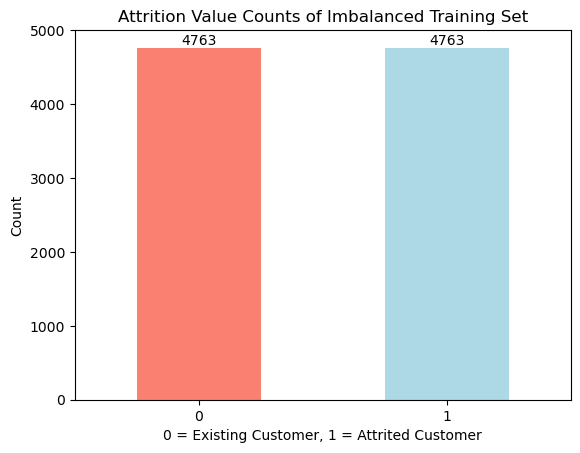

In [254]:
# Visualization of the value counts for the target column (balanced training set)
ax = y_train.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.title("Attrition Value Counts of Imbalanced Training Set")
plt.ylabel("Count")
plt.xlabel("0 = Existing Customer, 1 = Attrited Customer")
plt.xticks(rotation=0)
for container in ax.containers:
        ax.bar_label(container)
    

## Model Development

### 1. Deciding on the best models

#### Modeling and Scoring


In [255]:
# Dictionary of models
models = {"Random Forest": RandomForestClassifier(),
          "Gradient Boost": GradientBoostingClassifier(),
          "SVC": svm.SVC(),
          "XGBoost": XGBClassifier()}

# Function to fit and score our models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_score = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test) # fits the model using the training set
        model_score[name] = f"{score*100:.2f}%" # scores the model using the testing set 
    return model_score # returns a dictionary of models (keys) and scores (values)


#### Mean Accuracy Results

In [256]:
# Displays the mean accuracy score for each model by calling the function defined in the cell above ('fit_and_score')
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Random Forest': '95.34%',
 'Gradient Boost': '94.64%',
 'SVC': '73.11%',
 'XGBoost': '96.26%'}

`XGBClassifier()`, `RandomForestClassifier()`, and `GradientBoostingClassifier()` got a good mean accuracy score, so `SVC()` will be discarded.

Let's make some predictions to verify which model would be best suited to predict if a customer will be attrited or not. 


#### Predictions

In [257]:
# Instantiates the models
np.random.seed(42)
clf_rf = RandomForestClassifier()
clf_gb = GradientBoostingClassifier()
clf_xgb = XGBClassifier()

# Fits the models
clf_rf.fit(X_train, y_train)
clf_gb.fit(X_train, y_train)
clf_xgb.fit(X_train, y_train)

# Makes predictions
y_preds_rf = clf_rf.predict(X_test)
y_preds_gb = clf_gb.predict(X_test)
y_preds_xgb = clf_xgb.predict(X_test)


#### Classification report 

In [258]:
report_rf = classification_report(y_test, y_preds_rf)
report_gb = classification_report(y_test, y_preds_gb)
report_xgb = classification_report(y_test, y_preds_xgb)
print("\033[1m" + "Classification Reports" + "\033[0m" +"\n" )
print("Random Forest Classifier\n")
print(report_rf)
print("Gradient Boost Classifier\n")
print(report_gb)
print("XGBoost Classifier\n")
print(report_xgb)


Classification Reports

Random Forest Classifier

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1205
           1       0.82      0.89      0.85       212

    accuracy                           0.95      1417
   macro avg       0.90      0.93      0.91      1417
weighted avg       0.96      0.95      0.95      1417

Gradient Boost Classifier

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1205
           1       0.77      0.91      0.83       212

    accuracy                           0.95      1417
   macro avg       0.88      0.93      0.90      1417
weighted avg       0.95      0.95      0.95      1417

XGBoost Classifier

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1205
           1       0.86      0.90      0.88       212

    accuracy                           0.96      1417
   macro avg       0.92      0.

**Model Choice:** `XGBoostClassifier()`

In [259]:
clf_xgb.fit(X_train, y_train)
clf_score = clf_xgb.score(X_test, y_test)
print(f"The base XGBoost model's accuracy score is {clf_score*100:.2f}%.")

The base XGBoost model's accuracy score is 96.26%.


### 2. Tuning Hyperparameters (GridSearchCV)

This section aims to improve the model's predictions by tuning the model's hyperparameters with `GridSearchCV`. 

In [260]:
# Estimator
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

# Parameters Grid
params = {
    'max_depth': [8, 10],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.05]
}

# Grid Search CV
clf_xgb_gs = GridSearchCV(
    estimator=estimator,
    param_grid=params,
    cv = 5,
    verbose=True
)

In [262]:
# Fits the tuned model
clf_xgb_gs.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [8, 10], 'n_estimators': [50, 100, 150]},
             verbose=True)

In [263]:
# Gets the best parameters 
clf_xgb_gs.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [264]:
# Finds the accuracy score the tuned model
clf_xgb_gs.score(X_test, y_test)

0.9675370501058574

### 3. Final Model


In [94]:
# Instantiates the model with the parameters found in step 2
model = XGBClassifier(objective= 'binary:logistic', nthread=4, seed=42, 
                      max_depth=8, n_estimators=150, learning_rate=0.1)


# Fits the model
model.fit(X_train, y_train)

# Scores the model 
model_score = model.score(X_test, y_test)

# Makes predictions
y_preds = model.predict(X_test)


In [266]:
# Saves the model for the Application
pickle.dump(model, open("final_model.pkl", "wb"))

In [267]:
print(f"The base XGBoost model's accuracy score was {clf_score*100:.2f}%.")
print(f"After tuning the hyperparameters of the XGBoost model, its accuracy score is now of {model_score*100:.2f}%.")

The base XGBoost model's accuracy score was 96.26%.
After tuning the hyperparameters of the XGBoost model, its accuracy score is now of 96.75%.


## Accuracy Analysis


#### Classification Report

In [269]:
# Displays the classification report of the final model
class_report = classification_report(y_test, y_preds)
%store class_report
print("\033[1m" + "Classification Report of XGBoost Classifier" + "\033[0m" +"\n")
print(class_report)

Stored 'class_report' (str)
Classification Report of XGBoost Classifier

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1205
           1       0.88      0.91      0.89       212

    accuracy                           0.97      1417
   macro avg       0.93      0.94      0.94      1417
weighted avg       0.97      0.97      0.97      1417



#### Confusion Matrix

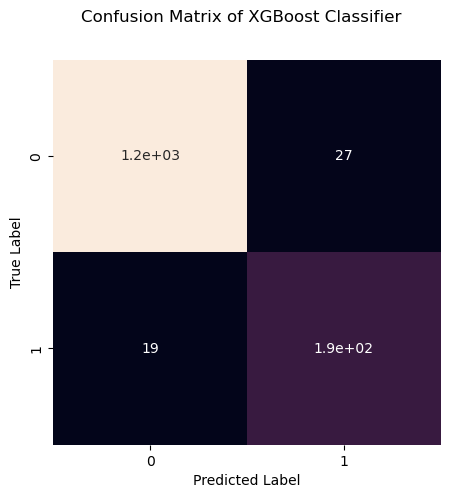

In [106]:
# Displays the confusion matrix of the final model
fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle("Confusion Matrix of XGBoost Classifier")
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot=True,
                 cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label");

In [107]:
fig.savefig("confusion_matrix.png")

#### ROC curve 

ROC curve of XGBoost Classifier



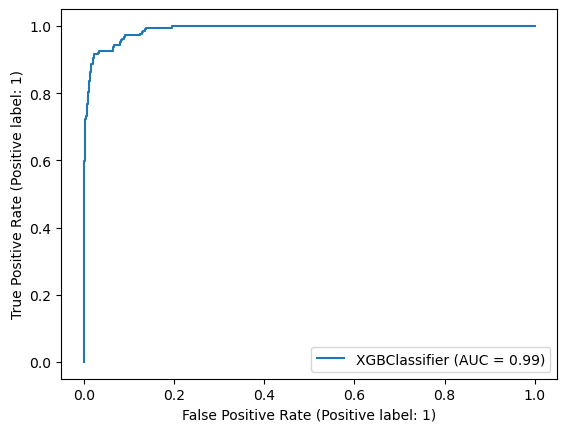

In [276]:
# Displays the ROC curve of the final model (area under the curve)
print("\033[1m" + "ROC curve of XGBoost Classifier" + "\033[0m" +"\n")
RocCurveDisplay.from_estimator(model, X_test, y_test);

#### Evaluation Metrics

In [279]:
# Displays the evaluation metrics of the final model

acc_score = accuracy_score(y_test, y_preds)

prec_score = precision_score(y_test, y_preds)

rec_score = recall_score(y_test, y_preds)

f_score = f1_score(y_test, y_preds)


print("The model's evaluation metrics:")
print(f"Accuracy: {acc_score*100:.2f}%")
print(f"Precision: {prec_score*100:.2f}%")
print(f"Recall: {rec_score*100:.2f}%")
print(f"F1: {f_score*100:.2f}%")

The model's evaluation metrics:
Accuracy: 96.75%
Precision: 87.73%
Recall: 91.04%
F1: 89.35%


In [280]:
# Stores the scores for the Application
%store acc_score
%store prec_score
%store rec_score
%store f_score

Stored 'acc_score' (float64)
Stored 'prec_score' (float64)
Stored 'rec_score' (float64)
Stored 'f_score' (float64)


#### Cross-Validation 

In [181]:
# Function that creates a dataframe of cross-validated metrics scores (accuracy, precision, recall, and f1)
def cross_validated_scores(clf, X, y, scoring):
    cv_metrics=[]
    for scores in scoring:
        np.random.seed(42)
        cross_scores = np.mean(cross_val_score(clf, X, y, cv=10, scoring=scores)) # uses cross_val_score
        cv_metrics.append(cross_scores)
    cv_metrics_df = pd.DataFrame({"Accuracy": cv_metrics[0],
                                      "Precision": cv_metrics[1],
                                      "Recall": cv_metrics[2],
                                      "F1": cv_metrics[3]}, index=[0])
    return cv_metrics_df


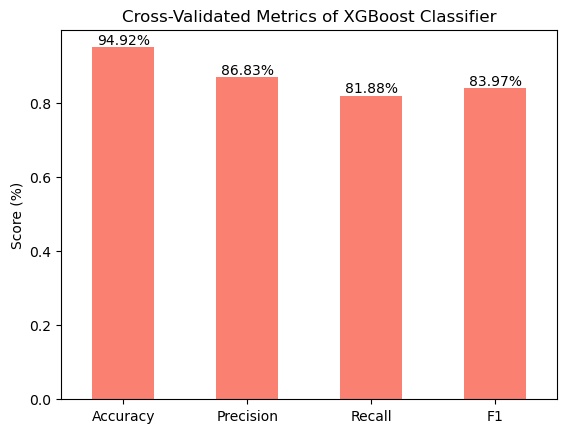

In [210]:
# List of scores to display
scoring = ["accuracy", "precision", "recall", "f1"]
# Calls the function created above ('cross_validated_scores')
cv_metrics_df = cross_validated_scores(model, X, y, scoring)

# Uses the dataframe of cross-validated metrics scores called 'cv_metrics_df' and displays it into a bar plot graph
ax = cv_metrics_df.T.plot.bar(title="Cross-Validated Metrics of XGBoost Classifier", legend=False, color="salmon")
plt.ylabel("Score (%)")
plt.xticks(rotation=0)
for container in ax.containers: 
    ax.bar_label(container, fmt=lambda x: "{:.2f}%".format(x*100))

# Saves the figure for the Application
plt.savefig("cross-validated-graph.png")

In [117]:
# Load the cross-validated accuracy of the prediction into a variable called 'val'
# 'val' will be used in the User Interface to display to the user the cross-validated accuracy of the prediction

val = cv_metrics_df['Accuracy'].iloc[0]
print(f"Cross-Validated Accuracy of the Prediction: {val*100:.1f}%")

Cross-Validated Accuracy of the Prediction: 94.9%


#### Feature Importance

Feature Importance of XGBoost Classifier



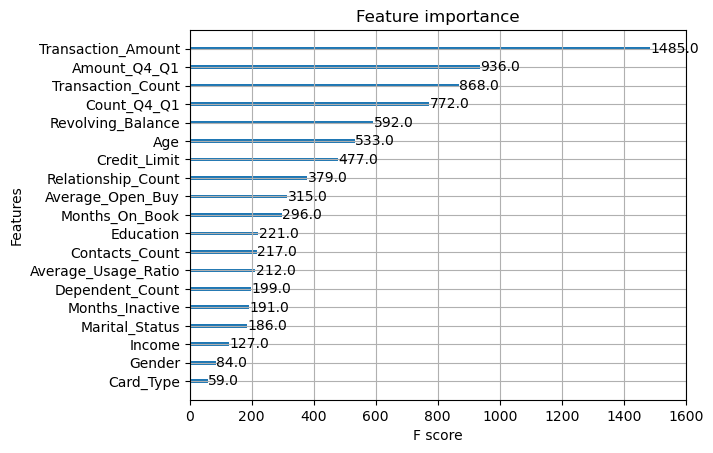

In [118]:
# Displays feature importance of the final model
print("\033[1m" + "Feature Importance of XGBoost Classifier" + "\033[0m" +"\n")
plot_importance(model, xlim=(0, 1600));


## User Interface


In [119]:

# Textboxes and drowpdowns for the user to enter values to make predictions

style = {'description_width': 'initial'} # predefines a style for inputs
layout = Layout(width='99%') # predefines a layout for inputs

age_widget = widgets.BoundedIntText(description='Age:',
                             value=0,
                             min=0,
                             max=100,
                             step=1,
                             style=style,
                             layout=layout)

gender_widget = widgets.Dropdown(description='Gender:',
                                 options=[('Male', 0), ('Female', 1)],
                                 value=0,
                                 style=style,
                                 layout=layout)

dep_count_widget = widgets.BoundedIntText(description='Number of Dependents:',
                                          value=0,
                                          min=0,
                                          max=20,
                                          step=1,
                                          style=style,
                                          layout=layout)

education_widget = widgets.Dropdown(description='Education Level:',
                                    options=[('Uneducated', 0), ('High School', 1), ('College', 2), ('Graduate', 3),
                                             ('Post-Graduate', 4), ('Doctorate', 5)],
                                    value=0,
                                    style=style,
                                    layout=layout)

marital_widget = widgets.Dropdown(description='Marital Status:',
                                  options=[('Single', 0), ('Divorced', 1), ('Married', 2)],
                                  value=0,
                                  style=style,
                                  layout=layout)

income_widget = widgets.Dropdown(description='Income Category:',
                                 options=[('Less than $40K', 0),('$40K - $60K', 1), ('$60K - $80K', 2),
                                          ('$80K - $120K', 3), ('$120K +', 4)],
                                 value=0,
                                 style=style,
                                 layout=layout)

card_widget = widgets.Dropdown(description='Card Type:',
                               options=[('Blue', 0), ('Silver', 1), ('Gold', 2), ('Platinum', 3)],
                               value=0,
                               style=style,
                               layout=layout)

months_onbook_widget = widgets.BoundedIntText(description='Period of Relationship\n with the Bank (months):',
                                              value=0,
                                              min=0,
                                              max=1000,
                                              step=1,
                                              style=style,
                                              layout=layout)

relationship_count_widget = widgets.BoundedIntText(description='Total Number of Products with the Bank:',
                                                   value=0,
                                                   min=0,
                                                   max=100,
                                                   step=1,
                                                   style=style,
                                                   layout=layout)

months_inactive_widget = widgets.BoundedIntText(description='Number of Months Inactive (last 12 months)',
                                                value=0,
                                                min=0,
                                                max=12,
                                                step=1,
                                                style=style,
                                                layout=layout)

contacts_count_widget = widgets.IntText(description='Number of Contacts with the Bank (last 12 months):',
                                               value=0,
                                               style=style,
                                               layout=layout)

credit_lim_widget = widgets.FloatText(description='Credit Limit:',
                                             value=0.0,
                                             style=style,
                                             layout=layout)

rev_balance_widget = widgets.IntText(description='Total Revolving Balance on Credit Card:',
                                            value=0,
                                            style=style,
                                            layout=layout)

avg_openbuy_widget = widgets.FloatText(description='Average Open to Buy Credit Line (last 12 months):',
                                              value=0.0,
                                              style=style,
                                              layout=layout)

amt_Q4Q1_widget = widgets.FloatText(description='Change in Transaction Amount (Q4/Q1):',
                                           value=0.0,
                                           style=style,
                                           layout=layout)

trans_amt_widget = widgets.IntText(description='Total Transaction Amount (last 12 months):',
                                          value=0,
                                          style=style,
                                          layout=layout)

trans_count_widget = widgets.IntText(description='Total Transaction Count (last 12 months):',
                                            value=0,
                                            style=style,
                                            layout=layout)

count_Q4Q1_widget = widgets.FloatText(description='Change in Transaction Count (Q4/Q1):',
                                             value=0,
                                             style=style,
                                             layout=layout)

avg_usage_ratio_widget = widgets.FloatText(description='Average Card Utilization Ratio:',
                                                  value=0.000,
                                                  style=style,
                                                  layout=layout)

# 'Predict' button
button_prediction = widgets.Button(description='Predict', layout=Layout(width='200px', height='30px', border='solid 2px black'))
button_prediction.style.font_weight = '600'
button_prediction.style.font_size = '16px'

# Defines and styles labels
label_title = widgets.Label(value="Customer Attrition Prediction")
label_title.style.font_size='30px'
label_title.style.font_weight = 'bold'

label_instruction = widgets.Label(value='Enter values in text boxes and press the \"Predict\" button to generate a prediction on customer attrition.')
label_instruction.style.font_size = '16px'
label_instruction.style.font_style = 'italic'

label_output = widgets.Label(value='Prediction')
label_output.style.font_size='20px'
label_output.style.font_weight = 'bold'


# Defines a function when the user clicks on the 'Predict' button
def on_click_predict(action):
    df_predict = pd.DataFrame([[age_widget.value, gender_widget.value, dep_count_widget.value, education_widget.value, marital_widget.value, income_widget.value, card_widget.value,
                                months_onbook_widget.value, relationship_count_widget.value, months_inactive_widget.value, contacts_count_widget.value, credit_lim_widget.value,
                                rev_balance_widget.value, avg_openbuy_widget.value, amt_Q4Q1_widget.value, trans_amt_widget.value, trans_count_widget.value, count_Q4Q1_widget.value,
                                avg_usage_ratio_widget.value]], columns=model.feature_names_in_)
    prediction = model.predict(df_predict)
    if prediction[0] == 0:  
        label_output.value = 'Existing Customer'
        
    if prediction[0] ==1:
        label_output.value= 'Attrited Customer'
    print(f"Accuracy of the Prediction: {accuracy_score(y_test, y_preds)*100:.1f}%")
    print(f"Cross-Validated Accuracy of the Prediction: {val*100:.1f}%")
    
    
button_prediction.on_click(on_click_predict)

# Predefines layouts
layout_hbox = Layout(justify_content='center') # layout for the input_hbox, button_hbox, and instruction_hbox
layout_title_output = Layout(justify_content='center',
                             border='solid 5px lightskyblue',
                             margin='10px 100px 10px 100px',
                             padding='5px 5px 5px 5px') # layout for the title_hbox and output_hbox

# Inserts the title into an HBox
title_hbox = widgets.HBox([label_title], layout=layout_title_output)

# Inserts the instruction into an HBox
instruction_hbox = widgets.HBox([label_instruction],layout=layout_hbox)

# Inserts textboxes and dropdowns (inputs) into a VBox
input_vbox = widgets.VBox([age_widget, gender_widget, dep_count_widget, education_widget, marital_widget, income_widget, card_widget,
                          months_onbook_widget, relationship_count_widget, months_inactive_widget, contacts_count_widget, credit_lim_widget,
                          rev_balance_widget, avg_openbuy_widget, amt_Q4Q1_widget,
                          trans_amt_widget, trans_count_widget, count_Q4Q1_widget, avg_usage_ratio_widget],
                          layout=Layout(flex_flow='column'))


# Inserts the input_vbox into an HBox to display its content in the center 
input_hbox = widgets.HBox([input_vbox], layout=layout_hbox)

# Inserts the button into an HBox
button_hbox = widgets.HBox([button_prediction],layout=layout_hbox)

# Inserts the output into an HBox
output_hbox = widgets.HBox([label_output],layout=layout_title_output)

# Displays the HBoxes 
display(title_hbox)
display(instruction_hbox)
display(input_hbox)
display(button_hbox)
display(output_hbox)


In [55]:
!pip freeze > requirements.txt